# Image Processing Demo using skimage and cv2

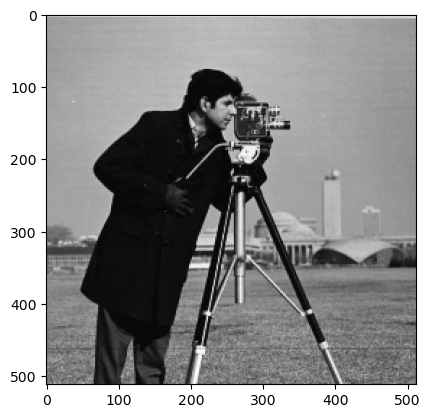

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.io import imread, imsave
cameraman = imread('images/cameraman.jpg')

plt.imshow(cameraman, cmap='gray')
plt.show()

# Edge Detection
## Roberts, Sobel, Scharr, Prewitt and Farid

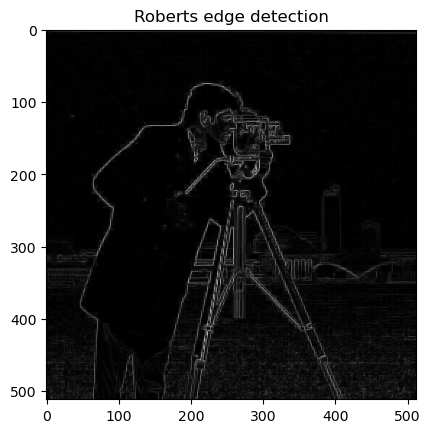

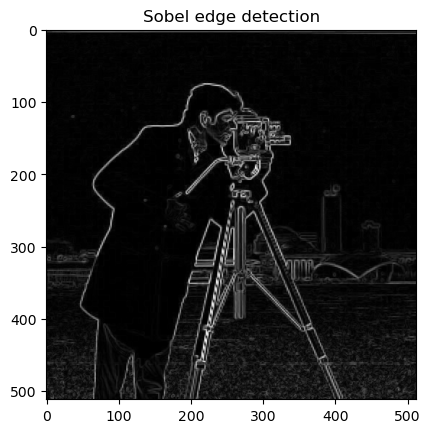

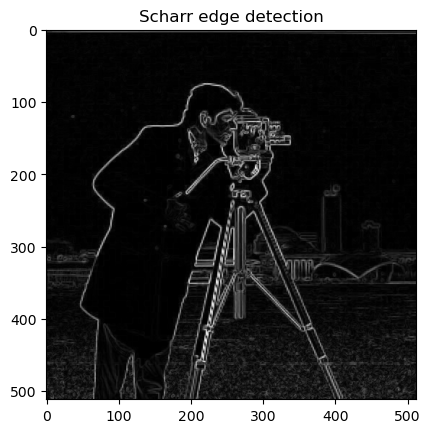

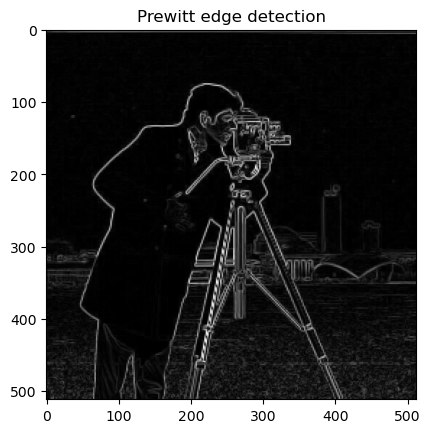

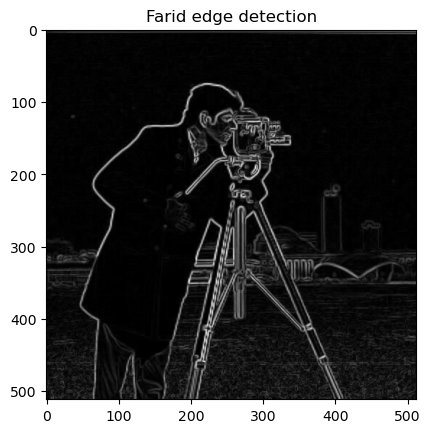

In [91]:
from skimage.filters import roberts, sobel, scharr, prewitt, farid

roberts_cameraman = roberts(cameraman)
sobel_cameraman = sobel(cameraman)
scharr_cameraman = scharr(cameraman)
prewitt_cameraman = prewitt(cameraman)
farid_cameraman = farid(cameraman)




plt.imshow(roberts_cameraman,cmap='gray')
plt.title('Roberts edge detection')
plt.show()

plt.imshow(sobel_cameraman,cmap='gray')
plt.title('Sobel edge detection')
plt.show()

plt.imshow(scharr_cameraman,cmap='gray')
plt.title('Scharr edge detection')
plt.show()

plt.imshow(prewitt_cameraman,cmap='gray')
plt.title('Prewitt edge detection')
plt.show()

plt.imshow(farid_cameraman,cmap='gray')
plt.title('Farid edge detection')
plt.show()

## Canny
<ol>
<li> Denoising (Gaussian) </li>
<li> Gradient detection (Sobel) </li>
<li> Non-maximum suppression (thin out edges/ reduce double edges) </li>
<li> Double Threshold </li>
<li> Edge Tracking by Hysteresis </li>
</ol>

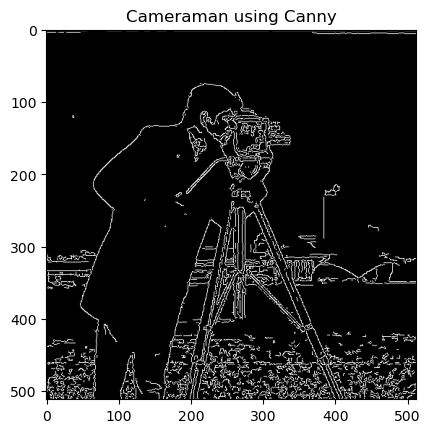

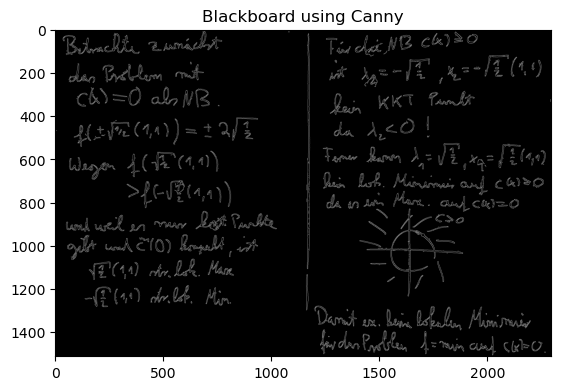

In [93]:
cameraman = cv2.imread('images/cameraman.jpg',0)
board = cv2.imread('images/tafel_low.png',0)



# heuristic for canny thresholds
std = 0.3
median = np.median(cameraman)
low, high = int(max(0,(1.0-std)*median)), int(min(255,(1.0+std)*median))

canny_cameraman = cv2.Canny(cameraman, low,high)

plt.imshow(canny_cameraman, cmap='gray')
plt.title('Cameraman using Canny')
plt.show()

# heuristic for canny thresholds
std = 0.3
median = np.median(board)
low, high = int(max(0,(1.0-std)*median)), int(min(255,(1.0+std)*median))

canny_board = cv2.Canny(board, low,high)

plt.imshow(canny_board, cmap='gray')
plt.title('Blackboard using Canny')
plt.show()

# Image Filtering using DFT/FFT

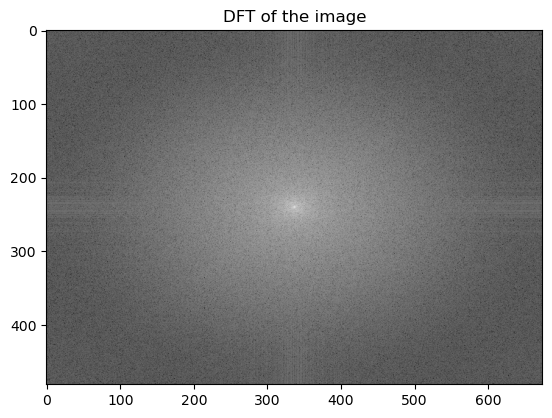

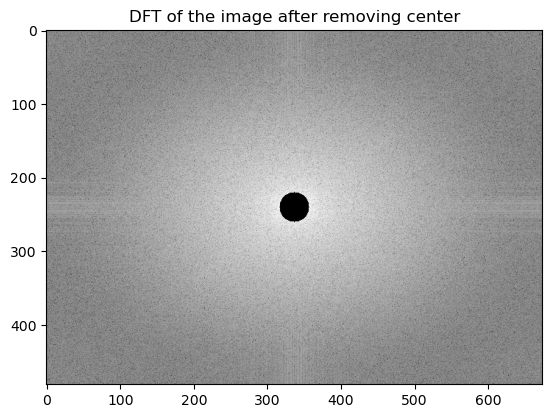

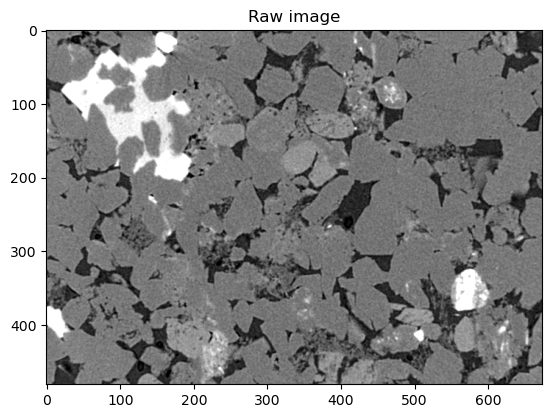

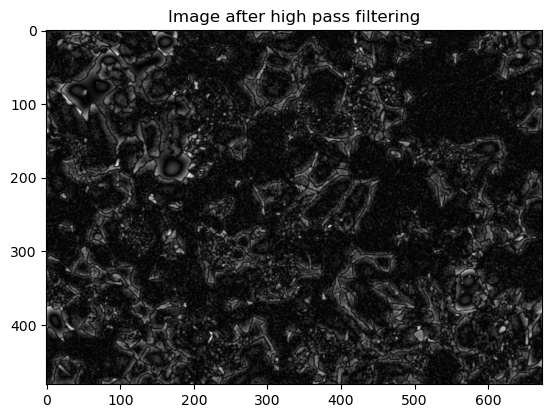

In [95]:
sandstone = cv2.imread('images/sandstone.tif',0)

sandstone_dft = cv2.dft(np.float32(sandstone), flags=cv2.DFT_COMPLEX_OUTPUT)
sandstone_dft_shift = np.fft.fftshift(sandstone_dft)
sandstone_dft = 20 * np.log(1+cv2.magnitude(sandstone_dft_shift[:,:,0], sandstone_dft_shift[:,:,1]))

plt.imshow(sandstone_dft,cmap='gray')
plt.title('DFT of the image')
plt.show()

# now use this to filter out the center of the dft
rows, cols = sandstone_dft.shape
r = 20
mask = np.ones((rows, cols, 2), np.uint8)
x, y = np.ogrid[:rows,:cols]
center_circle = (x - int(rows/2))**2 + (y - int(cols/2))**2 <= r**2
mask[center_circle] = 0

sandstone_dft_shift_filtered = sandstone_dft_shift * mask
sandstone_dft_filtered = 20 * np.log(1+cv2.magnitude(sandstone_dft_shift_filtered[:,:,0], sandstone_dft_shift_filtered[:,:,1]))

plt.imshow(sandstone_dft_filtered,cmap='gray')
plt.title('DFT of the image after removing center')
plt.show()

# inverse dft

sandstone_dft_filtered = np.fft.ifftshift(sandstone_dft_shift_filtered)
sandstone_filtered = cv2.idft(sandstone_dft_filtered)
sandstone_filtered = cv2.magnitude(sandstone_filtered[:,:,0], sandstone_filtered[:,:,1])

# regular image
plt.imshow(sandstone,cmap='gray')
plt.title('Raw image')
plt.show()

plt.imshow(sandstone_filtered,cmap='gray')
plt.title('Image after high pass filtering')
plt.show()


# Histogram Equalization and CLAHE
HE is an intensity transform that stretches your intensity histogram over
the whole intensity range. This improves contrast.

CLAHE (Contrastive adaptive limited histogram equalization) applies HE locally while
limiting contrast.

Split color images into L, a, b and apply to L channel.

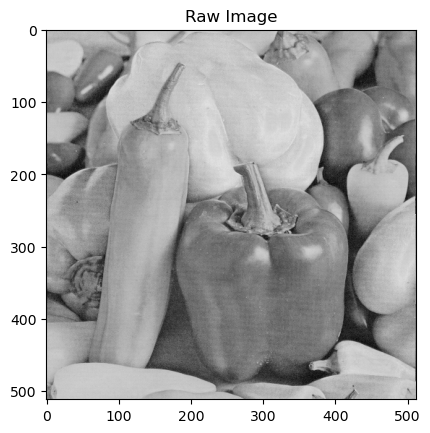

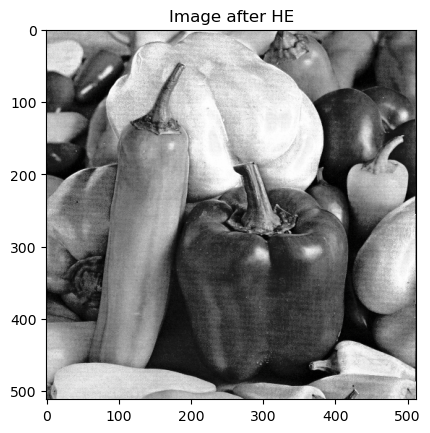

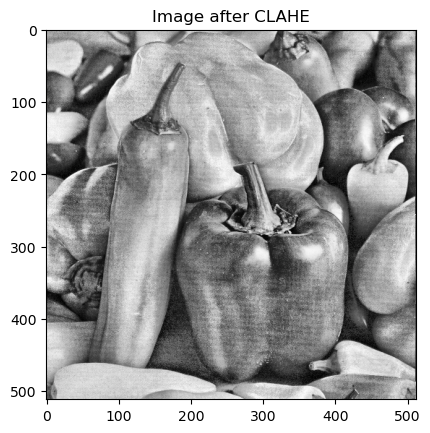

In [96]:
peppers = cv2.imread('images/peppers.png')

# apply he
peppers_lab = cv2.cvtColor(peppers, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(peppers_lab)
l_he = cv2.equalizeHist(l)
peppers_he = cv2.cvtColor(cv2.merge((l_he,a,b)), cv2.COLOR_LAB2BGR)

# apply clahe
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
peppers_clahe = cv2.cvtColor(cv2.merge((l_clahe,a,b)), cv2.COLOR_LAB2BGR)



plt.imshow(peppers)
plt.title('Raw Image')
plt.show()

plt.imshow(peppers_he)
plt.title('Image after HE')
plt.show()

plt.imshow(peppers_clahe)
plt.title('Image after CLAHE')
plt.show()